# **IN THIS NOTEBOOK I WILL PERFORM  UNIVARIATE TIME SERIES ANALYSIS USING THE LSTM (LONG-SHORT TERM MEMORY).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset
dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
data=pd.read_csv('MAster_methanol.csv',parse_dates=['Date'],date_parser=dateparse,usecols=['Date','Asia Price'])

<ipython-input-3-f4ab67922f0b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')


In [4]:
#data.dtypes
data.index=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [6]:
data.head()

,Date,Asia Price
Date,,
2005-10-07,2005-10-07,232.5
2005-10-14,2005-10-14,232.5
2005-10-21,2005-10-21,235.0
2005-10-28,2005-10-28,232.5
2005-11-04,2005-11-04,242.5


In [7]:
del data['Date']

In [8]:
data.head()

,Asia Price
Date,
2005-10-07,232.5
2005-10-14,232.5
2005-10-21,235.0
2005-10-28,232.5
2005-11-04,242.5


In [9]:
data.index

DatetimeIndex(['2005-10-07', '2005-10-14', '2005-10-21', '2005-10-28',
               '2005-11-04', '2005-11-11', '2005-11-18', '2005-11-25',
               '2005-12-02', '2005-12-09',
               ...
               '2021-02-19', '2021-02-26', '2021-03-05', '2021-03-12',
               '2021-03-19', '2021-03-26', '2021-04-02', '2021-04-09',
               '2021-04-16', '2021-04-23'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

<Axes: xlabel='Date'>

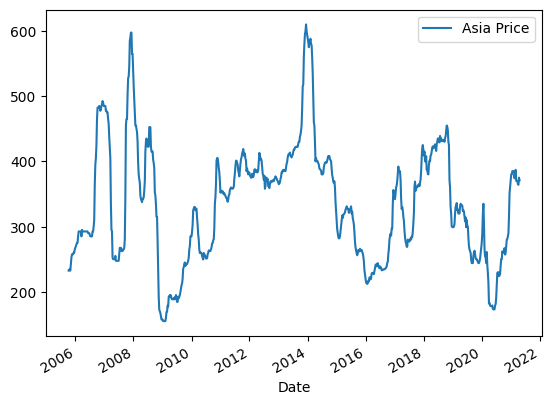

In [10]:
data.plot()

Splitting data into train and test set

In [11]:
train=data[:670]

In [12]:
test=data[670:]

In [13]:
len(train),len(test)

(670, 126)

In [14]:
#Feature scaling of data
#To convert data between scale of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [15]:
data.head(),data.tail()

(            Asia Price
 Date                  
 2005-10-07       232.5
 2005-10-14       232.5
 2005-10-21       235.0
 2005-10-28       232.5
 2005-11-04       242.5,
             Asia Price
 Date                  
 2021-03-26       370.0
 2021-04-02       365.0
 2021-04-09       364.0
 2021-04-16       375.0
 2021-04-23       371.0)

In [16]:
#fit scaler object on training test #cals std ,max,min value
scaler.fit(train) 

MinMaxScaler()

In [17]:
#transform the train and test in scalar object values
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [18]:
scaled_train[:10] #An array

array([[0.17032967],
       [0.17032967],
       [0.17582418],
       [0.17032967],
       [0.19230769],
       [0.21428571],
       [0.22527473],
       [0.22527473],
       [0.22527473],
       [0.23076923]])

In [19]:
scaled_test[:10] #An array

array([[0.64395604],
       [0.6043956 ],
       [0.59340659],
       [0.47472527],
       [0.45054945],
       [0.38461538],
       [0.36263736],
       [0.31868132],
       [0.31648352],
       [0.31648352]])

TIME SERIES ANALYSIS USING TENSORFLOW'S TIME SERIES GENERATOR

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
#Define generator given data is weekly 
#3 months=12 weeks data
n_input=12
n_features=1 #only 1 feature in the data
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [22]:
#Given values of 3 months in array ie,12 weeks, predicts 13th week's value
X,y=generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict the y: \n {y}')

Given the array: 
[0.17032967 0.17032967 0.17582418 0.17032967 0.19230769 0.21428571
 0.22527473 0.22527473 0.22527473 0.23076923 0.23076923 0.24175824]
Predict the y: 
 [[0.25274725]]


A PREVIEW OF HOW PREDICTIONS ARE MADE GIVEN 12 WEEKS DATA. THE MODEL PREDICTS THE 13th WEEK'S DATA

In [23]:
X,y=generator[1] #take values #from 2nd week and predict the 14th week and so on
print(f'Given the array: \n{X.flatten()}')
print(f'Predict the y: \n {y}')
#Given values of 3 months in array ie,12 weeks
#predicts 13th week's value

Given the array: 
[0.17032967 0.17582418 0.17032967 0.19230769 0.21428571 0.22527473
 0.22527473 0.22527473 0.23076923 0.23076923 0.24175824 0.25274725]
Predict the y: 
 [[0.25824176]]


In [24]:
X.shape

(1, 12, 1)

CREATING A LSTM MODEL USING KERAS LIBRARY FROM TENSORFLOW

In [25]:
#Calling models
#Layers added sequentially
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
#Define model
model=Sequential()

In [27]:
#LSTM layer with 100 neurons , activation function relu and input shape of data
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1)) # model layer final
model.compile(optimizer='adam',loss='mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Fit model
model.fit(generator,epochs=50)

Epoch 1/50
658/658 [==============================] - 6s 7ms/step - loss: 0.0125
Epoch 2/50
658/658 [==============================] - 5s 8ms/step - loss: 0.0035
Epoch 3/50
658/658 [==============================] - 5s 7ms/step - loss: 0.0025
Epoch 4/50
658/658 [==============================] - 5s 7ms/step - loss: 0.0018
Epoch 5/50
658/658 [==============================] - 4s 6ms/step - loss: 0.0014
Epoch 6/50
658/658 [==============================] - 5s 8ms/step - loss: 0.0011
Epoch 7/50
658/658 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 8/50
658/658 [==============================] - 5s 8ms/step - loss: 8.5453e-04
Epoch 9/50
658/658 [==============================] - 5s 7ms/step - loss: 8.4699e-04
Epoch 10/50
658/658 [==============================] - 4s 7ms/step - loss: 8.3104e-04
Epoch 11/50
658/658 [==============================] - 4s 6ms/step - loss: 7.0809e-04
Epoch 12/50
658/658 [==============================] - 5s 8ms/step - loss: 7.3448e-04
Epoch

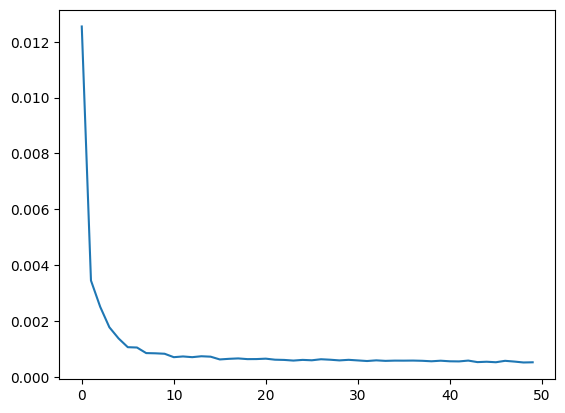

In [30]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

FUTURE PREDICTION- FORECASTING VALUES

In [31]:
#Last 3 months data of training test to predict the first value of test set
last_train_batch= scaled_train[-12:]

In [32]:
last_train_batch

array([[0.61538462],
       [0.60659341],
       [0.61098901],
       [0.60659341],
       [0.60659341],
       [0.61098901],
       [0.6043956 ],
       [0.61758242],
       [0.62197802],
       [0.63956044],
       [0.65934066],
       [0.65494505]])

In [33]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [34]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 210ms/step


array([[0.65542185]], dtype=float32)

In [35]:
scaled_test[0]

array([0.64395604])

As we can see the predicted value (0.66) and actual scaled test value (0.64) are very close , so the model is predicting good.

MAKING THE ACTUAL FUTURE PREDICTIONS

In [36]:
test_predictions=[]

first_batch=scaled_train[-n_input:]
curr_batch=first_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  #prediction value for first batch
  curr_pred=model.predict(curr_batch)[0]
  #append prediction into array
  test_predictions.append(curr_pred)
  curr_batch=np.append(curr_batch[:,1:,:],[[curr_pred]],axis=1)

1/1 [==============================] - 0s 40ms/step


In [37]:
curr_pred

array([0.58254796], dtype=float32)

In [38]:
curr_batch

array([[[0.58252949],
        [0.58253539],
        [0.58254033],
        [0.58254439],
        [0.58254761],
        [0.58254981],
        [0.58255118],
        [0.58255166],
        [0.58255154],
        [0.58255082],
        [0.58254957],
        [0.58254796]]])

In [39]:
curr_batch.shape

(1, 12, 1)

In [40]:
curr_pred

array([0.58254796], dtype=float32)

In [41]:
test_predictions

[array([0.65542185], dtype=float32),
 array([0.651835], dtype=float32),
 array([0.64546114], dtype=float32),
 array([0.63808477], dtype=float32),
 array([0.6302425], dtype=float32),
 array([0.62231743], dtype=float32),
 array([0.61476874], dtype=float32),
 array([0.6075258], dtype=float32),
 array([0.6007853], dtype=float32),
 array([0.59438753], dtype=float32),
 array([0.58826125], dtype=float32),
 array([0.5827215], dtype=float32),
 array([0.57774824], dtype=float32),
 array([0.5734442], dtype=float32),
 array([0.569882], dtype=float32),
 array([0.5670497], dtype=float32),
 array([0.5649394], dtype=float32),
 array([0.563531], dtype=float32),
 array([0.5627705], dtype=float32),
 array([0.56259745], dtype=float32),
 array([0.5629413], dtype=float32),
 array([0.56372714], dtype=float32),
 array([0.56488055], dtype=float32),
 array([0.5663262], dtype=float32),
 array([0.5679923], dtype=float32),
 array([0.5698109], dtype=float32),
 array([0.5717186], dtype=float32),
 array([0.5736575], 

In [42]:
test.head()

,Asia Price
Date,
2018-11-02,448.0
2018-11-09,430.0
2018-11-16,425.0
2018-11-23,371.0
2018-11-30,360.0


SCALING VALUES BACK TO ORIGINAL UNITS

In [43]:
true_predictions=scaler.inverse_transform(test_predictions)

In [44]:
test['Predictions']=true_predictions

<ipython-input-44-37e263692d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


ACTUAL VALUES VS PREDICTED VALUES OF ASIA PRICE

In [45]:
test.head()

,Asia Price,Predictions
Date,,
2018-11-02,448.0,453.216943
2018-11-09,430.0,451.584936
2018-11-16,425.0,448.684820
2018-11-23,371.0,445.328570
2018-11-30,360.0,441.760350


<Axes: xlabel='Date'>

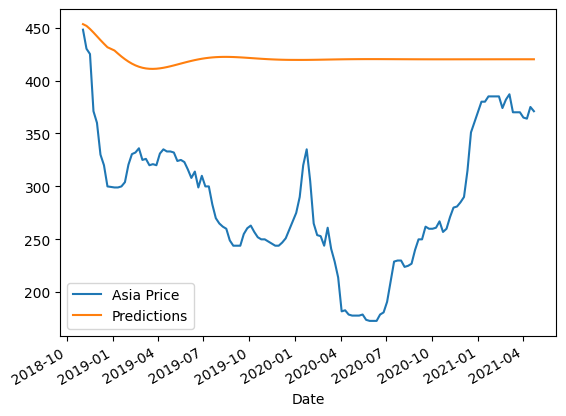

In [46]:
test.plot()

CALCULATING ROOT MEAN SQUARE ERROR

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

error=sqrt(mean_squared_error(test['Asia Price'],test['Predictions']))

print(error)

148.61285795136106


In [53]:
# Calculate range of test set
range_test = test.max() - test.min()

# Calculate Normalized RMSE
normalized_rmse = error / range_test

print(normalized_rmse)

Asia Price     0.540410
Predictions    3.518705
dtype: float64
